# Data Pipeline Project

##  Extract

I extract data from 7 CSV files to create 3 or 4 datasets.

###  Data Scource

I have uploaded my CSV files from Kaggle website and i decided that it must be different datasets. By engaging with diverse datasets, ranging in format, structure, and content the project aims to be interesting and challenging. it give opportunity to gain experience with various types of data and practice different techniques for cleaning.
Data sources: Kaggle
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023
https://www.kaggle.com/datasets/sazidthe1/world-gdp-growth
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023
https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository
https://www.kaggle.com/datasets/vladimirmijatovic/world-happiness-report-2024
https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset
https://www.kaggle.com/datasets/sazidthe1/global-unemployment-data

In [563]:
# fundamental modules import
import pandas as pd
import numpy as np
import codecs


# Reading the CSV files to Data Frames
df_weather = pd.read_csv(r"C:\Users\AlenaPavlioglo\Downloads\weather\weather.csv")
df_air = pd.read_csv(r"C:\Users\AlenaPavlioglo\Downloads\air_pol\air_pollution.csv")
df_unemp = pd.read_csv(r"C:\Users\AlenaPavlioglo\Downloads\2024\unemployment\global_unemployment.csv")
df_whr = pd.read_csv(r"C:\Users\AlenaPavlioglo\Downloads\WHR\whr.csv")
df_whr24 = pd.read_csv(r"C:\Users\AlenaPavlioglo\Downloads\2024\happiness\world_happiness_report_2024.csv")
df_population = pd.read_csv(r"C:\Users\AlenaPavlioglo\Downloads\population23\world_population.csv")




I have encountered issues when uploading my file. It has occured during the reading process (indicating decoding issues due to the specified encoding). I am using the 'Latin-1' encoding to handle errors.The 'latin-1' encoding is chosen here because it is more tolerant of special characters and byte sequences that cannot be decoded using UTF-8. This encoding can be useful when dealing with legacy text data or files with mixed encodings. 
The error handling strategy to be used if decoding errors occur. Default is set to 'replace'. **kwargs is an additional keyword arguments that will be passed to Pandas' read_csv() function.

In [ ]:
import pandas as pd

# I am using 'latin-1' encoding to handle decoding errors
def read_csv_with_encoding(file_path, encoding='latin-1', error_handling='replace', **kwargs):
    try:
        return pd.read_csv(file_path, encoding=encoding, **kwargs)
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError: {e}. Trying again with error handling strategy: {error_handling}")
        with open(file_path, encoding=encoding, errors=error_handling) as f:
            return pd.read_csv(f, **kwargs)

# Corrected placement of file_path variable assignment
file_path = r"C:\Users\AlenaPavlioglo\Downloads\2024\gdp\world_gdp_data.csv"
df_gdp = read_csv_with_encoding(file_path)

### EDA (Exploratory Data Analysis)

I explore the data to understand the main characteristic of the data, uncover patterns, spot anomalies, generate some insights for further analysis in structure, relationships and distributions. 
For the EDA i will perform:
1. Datatypes checking2. Checkingk the dimensions of the dataframe3. 
Check for missing value4. s
Check for duplicate ro5. ws
Look at the head and tail of the datafr6. ame
Look at basic summary statistics for the dataframe

In [633]:
# Displaing the first few rows of datasets
df_weather.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [634]:
# Displaing the last few rows of datasets
df_weather.tail()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
42066,Venezuela,Caracas,10.50,-66.92,America/Caracas,1712330100,2024-04-05 11:15,28.0,82.4,Partly cloudy,...,4.0,6.8,1,1,06:22 AM,06:38 PM,03:50 AM,03:53 PM,Waning Crescent,20
42067,Vietnam,Hanoi,21.03,105.85,Asia/Bangkok,1712331000,2024-04-05 22:30,25.0,77.0,Light rain,...,42.2,63.2,3,5,05:46 AM,06:12 PM,03:11 AM,02:40 PM,Waning Crescent,20
42068,Yemen,Sanaa,15.35,44.21,Asia/Aden,1712331000,2024-04-05 18:30,18.8,65.8,Patchy rain nearby,...,3.5,9.0,1,1,05:56 AM,06:16 PM,03:17 AM,03:05 PM,Waning Crescent,20
42069,Zambia,Lusaka,-15.42,28.28,Africa/Lusaka,1712331000,2024-04-05 17:30,26.5,79.7,Sunny,...,13.2,24.0,1,2,06:13 AM,06:06 PM,02:41 AM,03:45 PM,Waning Crescent,20
42070,Zimbabwe,Harare,-17.82,31.04,Africa/Harare,1712331000,2024-04-05 17:30,26.8,80.2,Sunny,...,11.9,14.9,1,1,06:03 AM,05:54 PM,02:26 AM,03:36 PM,Waning Crescent,20


In [635]:
# Displaying the dimentions of the dataset
print(df_weather.shape)

(42071, 41)


In [636]:
# Looking at basic summary statistic
print(df_weather.describe())

           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  42071.000000  42071.000000        4.207100e+04         42071.000000   
mean      19.297827     21.757903        1.702863e+09            19.323793   
std       24.517753     65.684700        5.581355e+06            10.671214   
min      -41.300000   -175.200000        1.693301e+09           -41.900000   
25%        3.750000     -6.840000        1.697834e+09            12.000000   
50%       17.250000     23.240000        1.703014e+09            22.000000   
75%       41.320000     49.880000        1.707674e+09            27.000000   
max       64.100000    179.220000        1.712331e+09            46.600000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            42071.000000  42071.000000  42071.000000  42071.000000   
mean                66.782751      7.539947     12.137099    162.942431   
std                 19.208338      5.198320      8.368158    106.159944 

In [118]:
df_air.head(10)

,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0,0,0,16.0,12.5,14.5,14.4
2,Algiers,Algeria,0,0,21.2,20.2,20.0,17.8,17.4
3,Ordino,Andorra,0,0,0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0,0,15.9,13.0,11.0,8.8,8.7
5,Buenos Aires,Argentina,0,0,12.4,14.2,13.6,14.2,14.2
6,Cordoba,Argentina,0,0,0,0,10.3,8.7,8.7
7,General Pico,Argentina,0,0,0,0,7.1,7.2,7.2
8,Mendoza,Argentina,0,0,0,0,9.3,8.2,8.2
9,Rafaela,Argentina,0,0,0,0,10.4,10.7,10.7


In [637]:
df_air.tail()

,city,Country,2017,2018,2019,2020,2021,2022,2023
6961,Montevideo,Uruguay,0.0,0.0,0.0,0.0,14.2,11.3,11.3
6962,Tashkent,Uzbekistan,0.0,34.3,41.2,29.9,42.8,33.5,31.9
6963,Ciudad Guayana,Venezuela,0.0,0.0,0.0,0.0,5.4,4.4,4.5
6964,Cam Pha,Vietnam,0.0,0.0,0.0,0.0,6.3,3.9,3.9
6984,Lusaka,Zambia,0.0,0.0,0.0,0.0,24.6,24.6,24.4


In [638]:
print(df_air.shape)

(133, 9)


In [639]:
print(df_air.describe())

             2017        2018        2019        2020        2021        2022  \
count  133.000000  133.000000  133.000000  133.000000  133.000000  133.000000   
mean     4.366917    5.572180    7.713534    9.105263   16.948120   19.033083   
std     11.595047   13.660962   13.419676   13.512370   15.829463   16.937849   
min      0.000000    0.000000    0.000000    0.000000    0.000000    1.300000   
25%      0.000000    0.000000    0.000000    0.000000    6.600000    8.700000   
50%      0.000000    0.000000    0.000000    0.000000   12.500000   13.900000   
75%      0.000000    3.700000   12.000000   14.700000   21.900000   22.500000   
max     79.700000   97.100000   83.300000   78.700000   91.000000   89.700000   

             2023  
count  133.000000  
mean    18.990977  
std     16.934130  
min      1.200000  
25%      8.700000  
50%     13.600000  
75%     22.200000  
max     91.100000  


In [77]:
df_unemp.head()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [640]:
df_unemp.tail()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1129,Zimbabwe,Unemployment rate by sex and age,Female,25+,Adults,4.262,4.586,4.773,4.900,5.027,5.309,6.345,7.792,7.704,7.597,7.528
1130,Zimbabwe,Unemployment rate by sex and age,Female,Under 15,Children,5.174,5.666,6.014,6.289,6.555,6.990,8.494,9.853,9.670,9.518,9.414
1131,Zimbabwe,Unemployment rate by sex and age,Male,15-24,Youth,6.007,7.131,8.119,9.029,9.927,11.048,13.191,14.261,13.966,13.675,13.485
1132,Zimbabwe,Unemployment rate by sex and age,Male,25+,Adults,3.677,4.325,4.843,5.287,5.722,6.362,6.996,7.234,6.858,6.757,6.703
1133,Zimbabwe,Unemployment rate by sex and age,Male,Under 15,Children,4.355,5.152,5.821,6.410,6.984,7.760,8.809,9.223,8.842,8.713,8.632


In [641]:
print(df_unemp.shape)

(1134, 16)


In [642]:
print(df_unemp.describe())

              2014         2015         2016         2017         2018  \
count  1134.000000  1134.000000  1134.000000  1134.000000  1134.000000   
mean     11.387800    11.272444    11.122963    10.863516    10.516499   
std      11.119002    10.915942    10.742947    10.640980    10.527773   
min       0.027000     0.034000     0.038000     0.035000     0.044000   
25%       3.933500     3.993500     3.945250     3.747500     3.672750   
50%       7.697500     7.547500     7.504500     7.140500     6.706000   
75%      15.050750    14.766250    14.467500    14.142000    13.343000   
max      74.485000    74.655000    74.720000    75.416000    76.395000   

              2019         2020         2021         2022         2023  \
count  1134.000000  1134.000000  1134.000000  1128.000000  1122.000000   
mean     10.311452    11.851285    11.422645    10.340361     9.985181   
std      10.297952    11.231580    10.873412    10.264810     9.987778   
min       0.036000     0.056000     0

In [78]:
df_whr.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [643]:
df_whr.tail()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110
136,Afghanistan,1.859,0.033,1.923,1.795,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976


In [644]:
print(df_whr.shape)

(137, 19)


In [645]:
print(df_whr.describe())

       Ladder score  Standard error of ladder score  upperwhisker  \
count    137.000000                      137.000000    137.000000   
mean       5.539796                        0.064715      5.666526   
std        1.139929                        0.023031      1.117421   
min        1.859000                        0.029000      1.923000   
25%        4.724000                        0.047000      4.980000   
50%        5.684000                        0.060000      5.797000   
75%        6.334000                        0.077000      6.441000   
max        7.804000                        0.147000      7.875000   

       lowerwhisker  Logged GDP per capita  Social support  \
count    137.000000             137.000000      137.000000   
mean       5.412971               9.449796        0.799073   
std        1.163724               1.207302        0.129222   
min        1.795000               5.527000        0.341000   
25%        4.496000               8.591000        0.722000   
50%   

In [79]:
df_whr24.head()

,country,all_ages,the_young,lower_middle,upper_middle,the_old,happiest,least_happy
0,Finland,1,7,1,1,2,Old,Young
1,Denmark,2,5,3,4,1,Old,Young
2,Iceland,3,4,4,2,5,Young,LowerMiddle
3,Sweden,4,18,8,3,4,Old,Young
4,Israel,5,2,2,7,18,Young,Old


In [646]:
df_whr24.tail()

,country,all_ages,the_young,lower_middle,upper_middle,the_old,happiest,least_happy
138,Congo (Kinshasa),139,140,137,134,139,Young,Old
139,Sierra Leone,140,141,136,132,133,Old,LowerMiddle
140,Lesotho,141,138,141,142,138,Young,UpperMiddle
141,Lebanon,142,142,142,141,141,Young,Old
142,Afghanistan,143,143,143,143,143,Young,Old


In [647]:
print(df_whr24.shape)

(143, 8)


In [648]:
print(df_whr24.describe())

        all_ages  the_young  lower_middle  upper_middle    the_old
count  143.00000  143.00000     143.00000     143.00000  143.00000
mean    72.00000   72.00000      72.00000      72.00000   72.00000
std     41.42463   41.42463      41.42463      41.42463   41.42463
min      1.00000    1.00000       1.00000       1.00000    1.00000
25%     36.50000   36.50000      36.50000      36.50000   36.50000
50%     72.00000   72.00000      72.00000      72.00000   72.00000
75%    107.50000  107.50000     107.50000     107.50000  107.50000
max    143.00000  143.00000     143.00000     143.00000  143.00000


In [82]:
df_population.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [649]:
df_population.tail()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
229,230,MSR,Montserrat,North America,4386,4390,4500,5059,4938,5138,10805,11452,11402,102.00,43,-0.09%,0.00%
230,231,FLK,Falkland Islands,South America,3791,3780,3747,3408,3187,3080,2332,2240,2274,12173.00,0,0.29%,0.00%
231,232,NIU,Niue,Oceania,1935,1934,1942,1847,1812,2074,2533,3637,5185,261.00,7,0.05%,0.00%
232,233,TKL,Tokelau,Oceania,1893,1871,1827,1454,1367,1666,1669,1647,1714,12.00,189,1.18%,0.00%
233,234,VAT,Vatican City,Europe,518,510,520,564,596,651,700,733,752,0.44,1177,1.57%,0.00%


In [650]:
print(df_population.shape)

(234, 17)


In [651]:
print(df_population.describe())

             rank  2023 population  2022 population  2020 population  \
count  234.000000     2.340000e+02     2.340000e+02     2.340000e+02   
mean   117.500000     3.437442e+07     3.407441e+07     3.350107e+07   
std     67.694165     1.373864e+08     1.367664e+08     1.355899e+08   
min      1.000000     5.180000e+02     5.100000e+02     5.200000e+02   
25%     59.250000     4.225982e+05     4.197385e+05     4.152845e+05   
50%    117.500000     5.643895e+06     5.559944e+06     5.493074e+06   
75%    175.750000     2.324537e+07     2.247650e+07     2.144798e+07   
max    234.000000     1.428628e+09     1.425887e+09     1.424930e+09   

       2015 population  2010 population  2000 population  1990 population  \
count     2.340000e+02     2.340000e+02     2.340000e+02     2.340000e+02   
mean      3.172996e+07     2.984524e+07     2.626947e+07     2.271022e+07   
std       1.304050e+08     1.242185e+08     1.116982e+08     9.783217e+07   
min       5.640000e+02     5.960000e+02    

In [313]:
df_gdp.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual GDP growth (percent change),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.2,2.6,1.2,3.9,-2.4,-20.7,NaN,NaN,NaN
1,Albania,Annual GDP growth (percent change),2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,...,2.2,3.3,3.8,4.0,2.1,-3.3,8.9,4.8,3.6,3.3
2,Algeria,Annual GDP growth (percent change),-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,...,3.7,3.2,1.4,1.2,1.0,-5.1,3.4,3.2,3.8,3.1
3,Andorra,Annual GDP growth (percent change),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4,3.7,0.3,1.6,2.0,-11.2,8.3,8.8,2.1,1.5
4,Angola,Annual GDP growth (percent change),2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,...,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.2,3.0,1.3,3.3


In [652]:
df_gdp.tail()

,Country,2020,2021,2022,2023,2024,GDP Growth Rate
191,Vietnam,2.9,2.6,8.0,4.7,5.8,100.000000
192,West Bank and Gaza,-11.3,7.0,3.9,3.0,2.7,-123.893805
193,Yemen,-8.5,-1.0,1.5,-0.5,2.0,-123.529412
194,Zambia,-2.8,4.6,4.7,3.6,4.3,-253.571429
195,Zimbabwe,-7.8,8.4,6.2,4.1,3.6,-146.153846


In [653]:
print(df_gdp.shape)

(196, 7)


In [654]:
print(df_gdp.describe())

             2020        2021        2022        2023        2024  \
count  196.000000  196.000000  196.000000  196.000000  196.000000   
mean    -5.012347    5.367551    4.124796    3.331888    3.596429   
std      8.129765    6.204905    6.551704    6.303428    3.022588   
min    -54.200000  -20.700000  -29.100000  -18.300000   -5.500000   
25%     -7.725000    2.825000    2.300000    1.475000    2.200000   
50%     -3.850000    5.150000    4.000000    2.850000    3.200000   
75%     -1.275000    7.250000    5.950000    4.400000    4.300000   
max     43.500000   41.700000   62.300000   74.400000   27.200000   

       GDP Growth Rate  
count       196.000000  
mean               inf  
std                NaN  
min       -1866.666667  
25%        -186.413709  
50%        -143.519814  
75%        -116.294643  
max                inf  


In [10]:
# Displaying a summary of df_air dataset, including information about its index, datatypes and non-null values.
# Its provides a quick overview of the structure of the Dataframe, making it useful 
# for  understanding potential issues such us missing values and incorrect data types.

df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985 entries, 0 to 6984
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     6985 non-null   object
 1   country  6985 non-null   object
 2   2017     6985 non-null   object
 3   2018     6985 non-null   object
 4   2019     6985 non-null   object
 5   2020     6985 non-null   object
 6   2021     6985 non-null   object
 7   2022     6985 non-null   object
 8   2023     6985 non-null   object
dtypes: object(9)
memory usage: 491.3+ KB


In [31]:
df_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [32]:
df_whr24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       143 non-null    object
 1   all_ages      143 non-null    int64 
 2   the_young     143 non-null    int64 
 3   lower_middle  143 non-null    int64 
 4   upper_middle  143 non-null    int64 
 5   the_old       143 non-null    int64 
 6   happiest      143 non-null    object
 7   least_happy   143 non-null    object
dtypes: int64(5), object(3)
memory usage: 9.1+ KB


In [316]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  196 non-null    object 
 1   2020          194 non-null    float64
 2   2021          194 non-null    float64
 3   2022          193 non-null    float64
 4   2023          191 non-null    float64
 5   2024          191 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.3+ KB


In [52]:
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1134 non-null   object 
 1   indicator_name  1134 non-null   object 
 2   sex             1134 non-null   object 
 3   age_group       1134 non-null   object 
 4   age_categories  1134 non-null   object 
 5   2014            1134 non-null   float64
 6   2015            1134 non-null   float64
 7   2016            1134 non-null   float64
 8   2017            1134 non-null   float64
 9   2018            1134 non-null   float64
 10  2019            1134 non-null   float64
 11  2020            1134 non-null   float64
 12  2021            1134 non-null   float64
 13  2022            1128 non-null   float64
 14  2023            1122 non-null   float64
 15  2024            1122 non-null   float64
dtypes: float64(11), object(5)
memory usage: 141.9+ KB


In [53]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42071 entries, 0 to 42070
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       42071 non-null  object 
 1   location_name                 42071 non-null  object 
 2   latitude                      42071 non-null  float64
 3   longitude                     42071 non-null  float64
 4   timezone                      42071 non-null  object 
 5   last_updated_epoch            42071 non-null  int64  
 6   last_updated                  42071 non-null  object 
 7   temperature_celsius           42071 non-null  float64
 8   temperature_fahrenheit        42071 non-null  float64
 9   condition_text                42071 non-null  object 
 10  wind_mph                      42071 non-null  float64
 11  wind_kph                      42071 non-null  float64
 12  wind_degree                   42071 non-null  int64  
 13  w

In [54]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    object 
dt

# Cleaning and Transforming Data

Cleaning and transforming data are crucial steps in data pipelines. Data cleaning ensures that the data is accurate, complete, and consistent, which improves the quality and reliability of the analysis. Transforming data allows to restructure or aggregate it in a way that is more suitable for the analysis.

### Cleaning the Air Dataset

In [564]:
 # Checking nulls for air dataset
df_air.isnull().sum().sort_values()

city       0
country    0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
dtype: int64

In [565]:
# Handle missing values
df_air.dropna(inplace=True)

# Remove duplicates
df_air.drop_duplicates(inplace=True)
df_air = df_air.drop_duplicates(subset=['country'])
# Rename the columns
df_air.rename( columns={'country': 'Country'}, inplace = True)

# List of columns to convert to numeric
numeric_columns = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Convert columns to numeric data type
df_air[numeric_columns] = df_air[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Round numeric columns to 1 decimal place
df_air[numeric_columns] = df_air[numeric_columns].round(1)

In [566]:
# Checking the cleaned data set
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 0 to 6984
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     133 non-null    object 
 1   Country  133 non-null    object 
 2   2017     133 non-null    float64
 3   2018     133 non-null    float64
 4   2019     133 non-null    float64
 5   2020     133 non-null    float64
 6   2021     133 non-null    float64
 7   2022     133 non-null    float64
 8   2023     133 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.4+ KB


In [387]:
df_air.head(10)

,city,Country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0.0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0.0,0.0,0.0,16.0,12.5,14.5,14.4
2,Algiers,Algeria,0.0,0.0,21.2,20.2,20.0,17.8,17.4
3,Ordino,Andorra,0.0,0.0,0.0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0.0,0.0,15.9,13.0,11.0,8.8,8.7
5,Buenos Aires,Argentina,0.0,0.0,12.4,14.2,13.6,14.2,14.2
11,Yeghegnavan,Armenia,0.0,0.0,31.8,26.6,36.7,28.4,28.3
13,Adelaide,Australia,0.0,6.5,5.9,5.6,5.1,3.7,3.6
183,Amstetten,Austria,0.0,0.0,0.0,0.0,11.9,11.2,11.2
247,Baku,Azerbaijan,0.0,0.0,0.0,0.0,17.6,18.9,19.1


### Cleaning the Weather Dataset

In [513]:
 # Checking nulls for air dataset
df_weather.isnull().sum().sort_values()

Country                         0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
sunrise                         0
sunset                          0
moonrise                        0
moonset                         0
feels_like_fahrenheit           0
moon_phase                      0
feels_like_celsius              0
humidity                        0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fa

In [517]:
# Define the columns to keep
# Convert 'uv_index' column to integer
df_weather['uv_index'] = df_weather['uv_index'].astype(np.int64)

# Drop Duplicates
df_weather.drop_duplicates(inplace=True)
df_weather.drop_duplicates(subset=['country'])
df_weather.rename( columns={'country': 'Country'}, inplace = True)

# Name the columns i want to keep
columns_to_keep = ['Country', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
                   'air_quality_Sulphur_dioxide', 'air_quality_Nitrogen_dioxide', 
                   'humidity', 'temperature_celsius', 'uv_index']

# Drop columns not in columns_to_keep
df_weather_cleaned = df_weather[columns_to_keep]

In [515]:
df_weather_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42071 entries, 0 to 42070
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       42071 non-null  object 
 1   air_quality_Carbon_Monoxide   42071 non-null  float64
 2   air_quality_Ozone             42071 non-null  float64
 3   air_quality_Sulphur_dioxide   42071 non-null  float64
 4   air_quality_Nitrogen_dioxide  42071 non-null  float64
 5   humidity                      42071 non-null  int64  
 6   temperature_celsius           42071 non-null  float64
 7   uv_index                      42071 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 2.6+ MB


In [140]:
df_weather_cleaned.head()

,country,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,humidity,temperature_celsius,uv_index
0,Afghanistan,647.5,130.2,0.4,1.2,19,28.8,7
1,Albania,433.9,104.4,1.8,3.6,54,27.0,6
2,Algeria,647.5,16.6,12.6,63.1,30,28.0,7
3,Andorra,190.3,68.0,0.2,0.2,51,10.2,4
4,Angola,2136.2,147.3,26.9,52.8,69,25.0,6


### Cleaning World Happiness Report Dataset

In [157]:
 # Checking nulls for air dataset
df_whr.isnull().sum().sort_values()

Country name                                  0
Explained by: Generosity                      0
Explained by: Freedom to make life choices    0
Explained by: Social support                  0
Explained by: Log GDP per capita              0
Ladder score in Dystopia                      0
Perceptions of corruption                     0
Explained by: Perceptions of corruption       0
Generosity                                    0
Social support                                0
Logged GDP per capita                         0
lowerwhisker                                  0
upperwhisker                                  0
Standard error of ladder score                0
Ladder score                                  0
Freedom to make life choices                  0
Healthy life expectancy                       1
Explained by: Healthy life expectancy         1
Dystopia + residual                           1
dtype: int64

In [175]:
# Replacing missing values with mean 
mean_healthy_life_expectancy = df_whr['Healthy life expectancy'].mean()
mean_explained_health_expectancy = df_whr['Explained by: Healthy life expectancy'].mean()
mean_dystopia_residual = df_whr['Dystopia + residual'].mean()

df_whr['Healthy life expectancy'].fillna(mean_healthy_life_expectancy, inplace=True)
df_whr['Explained by: Healthy life expectancy'].fillna(mean_explained_health_expectancy, inplace=True)
df_whr['Dystopia + residual'].fillna(mean_dystopia_residual, inplace=True)

df_whr.drop_duplicates(inplace=True)

# Renaming the "Country name" column in df_whr
df_whr.rename(columns={"Country name": "Country"}, inplace=True)

# Sort the DataFrame by the "Country" column in alphabetical order
df_whr_sorted = df_whr.sort_values(by='Country', ascending=True)

# Reset the index after sorting
df_whr_sorted.reset_index(drop=True, inplace=True)

In [176]:
df_whr_sorted.head()

,Country,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,1.859,0.033,1.923,1.795,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,5.277,0.066,5.406,5.148,9.567,0.718,69.150,0.794,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,5.329,0.062,5.451,5.207,9.300,0.855,66.549,0.571,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,6.024,0.063,6.147,5.900,9.959,0.891,67.200,0.823,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861
4,Armenia,5.342,0.066,5.470,5.213,9.615,0.790,67.789,0.796,-0.155,0.705,1.778,1.466,1.134,0.443,0.551,0.053,0.160,1.534


### Cleaning World Happiness Report 2024 dataset

In [174]:
df_whr24.isnull().sum().sort_values()

country         0
all_ages        0
the_young       0
lower_middle    0
upper_middle    0
the_old         0
happiest        0
least_happy     0
dtype: int64

In [190]:
# I would like to sort the DataFrame by the "Country" column in alphabetical order
df_whr24= df_whr24.sort_values(by='country', ascending=True)

# Reset the index after sorting
df_whr24.reset_index(drop=True, inplace=True)

df_whr.drop_duplicates(inplace=True)

# I would like to keep only 2 columns so will drop the rest of the columns

columns_to_keep = ['country', 'happiest', 'least_happy']

# Drop columns not in columns_to_keep
df_whr24_cleaned = df_whr24[columns_to_keep]

In [196]:
df_whr24_cleaned.head()

,country,happiest,least_happy
0,Afghanistan,Young,Old
1,Albania,Young,Old
2,Algeria,Old,UpperMiddle
3,Argentina,Young,UpperMiddle
4,Armenia,Young,Old


In [528]:
# I would like to join 2 World Happiest Report Datasets on "country" field to make it easier to analise
# I will concatenate dataframes df_whr_sorted and df_whr24_cleaned along the columns,
# joining by the 'Country' column
combined_df_whr = pd.concat([df_whr_sorted.set_index('Country'), df_whr24_cleaned.set_index('country')], axis=1, join='inner')

# Reset index to make 'Country' a column again
combined_df_whr.reset_index(inplace=True)

# Rename the 'index' column back to 'Country'
combined_df_whr.rename(columns={'index': 'Country'}, inplace=True)
# Display the combined dataframe
print(combined_df_whr.head())

       Country  Ladder score  Standard error of ladder score  upperwhisker  \
0  Afghanistan         1.859                           0.033         1.923   
1      Albania         5.277                           0.066         5.406   
2      Algeria         5.329                           0.062         5.451   
3    Argentina         6.024                           0.063         6.147   
4      Armenia         5.342                           0.066         5.470   

   lowerwhisker  Logged GDP per capita  Social support  \
0         1.795                  7.324           0.341   
1         5.148                  9.567           0.718   
2         5.207                  9.300           0.855   
3         5.900                  9.959           0.891   
4         5.213                  9.615           0.790   

   Healthy life expectancy  Freedom to make life choices  Generosity  ...  \
0                   54.712                         0.382      -0.081  ...   
1                   69.150  

### Cleaning Population Dataset

In [378]:
# Checking for null values
df_population.isnull().sum().sort_values()

rank                0
density (km²)       0
area (km²)          0
1970 population     0
1980 population     0
1990 population     0
2000 population     0
growth rate         0
2010 population     0
2020 population     0
2022 population     0
2023 population     0
continent           0
country             0
cca3                0
2015 population     0
world percentage    0
dtype: int64

In [379]:
print(df_population.columns)

Index(['rank', 'cca3', 'country', 'continent', '2023 population',
       '2022 population', '2020 population', '2015 population',
       '2010 population', '2000 population', '1990 population',
       '1980 population', '1970 population', 'area (km²)', 'density (km²)',
       'growth rate', 'world percentage'],
      dtype='object')


In [527]:
df_population.drop_duplicates(inplace=True)

# Remove '%' symbol from 'growth rate' column and convert to float
df_population['growth rate'] = df_population['growth rate'].str.rstrip('%').astype(float)

# Remove '%' symbol from 'world percentage' column and convert to float
df_population['world percentage'] = df_population['world percentage'].str.rstrip('%').astype(float)

# Convert data types and rename columns in df_population
df_population['area (km²)'] = df_population['area (km²)'].astype('int64')

df_population.rename(columns={'country': 'Country'}, inplace = True)

# Drop columns except specified ones
columns_to_keep = ['Country', 'area (km²)', 'density (km²)', 'growth rate', 'world percentage', '2020 population', '2022 population', '2023 population']
df_population = df_population[columns_to_keep]

# Display the modified dataframe
print(df_population.head())

         Country  area (km²)  density (km²)  growth rate  world percentage  \
0          India     3287590            481         0.81             17.85   
1          China     9706961            151        -0.02             17.81   
2  United States     9372610             37         0.50              4.25   
3      Indonesia     1904569            148         0.74              3.47   
4       Pakistan      881912            312         1.98              3.00   

   2020 population  2022 population  2023 population  
0       1396387127       1417173173       1428627663  
1       1424929781       1425887337       1425671352  
2        335942003        338289857        339996563  
3        271857970        275501339        277534122  
4        227196741        235824862        240485658  


### Cleaning Unemployment Dataset

In [363]:
# Checking for null values
df_unemp.isnull().sum().sort_values()

country_name      0
indicator_name    0
sex               0
age_group         0
age_categories    0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
2024              0
dtype: int64

In [364]:
# Fill null values in columns 2022, 2023, and 2024 with mean
mean_2022 = df_unemp['2022'].mean()
mean_2023 = df_unemp['2023'].mean()
mean_2024 = df_unemp['2024'].mean()

df_unemp['2022'].fillna(mean_2022, inplace=True)
df_unemp['2023'].fillna(mean_2023, inplace=True)
df_unemp['2024'].fillna(mean_2024, inplace=True)

# Round the values to 2 decimal places
df_unemp['2022'] = df_unemp['2022'].round(2)
df_unemp['2023'] = df_unemp['2023'].round(2)
df_unemp['2024'] = df_unemp['2024'].round(2)

 Initially, the 'age_group' field contained inconsistent values across different rows. For example, some rows may have had variations in how age groups were represented, such as '15-24', '25+', and 'Under 15', while others might have used different formats like '15 to 24', '25 and above', or 'Under 15 years'. This inconsistency in data formatting can lead to challenges in data analysis and interpretation. To address this issue, I decided to standardize the values in the 'age_group' field. By doing so, I ensured that all age group representations followed a consistent format, making it easier to analyze and interpret the data. Standardizing the age group values helps in maintaining data integrity and ensuring accuracy in analysis. I have grouped the data by the 'country_name' column. I decided to use grouping because it allows us to aggregate data based on unique country names. By grouping the data by country, we can calculate summary statistics for each country individually.

In [365]:

# Group by country and calculate the mean unemployment rate across all age categories. 
# Renaming the 'country_name' to common column name 'Country'
summary_unemp_df = df_unemp.groupby('country_name')[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].mean().reset_index()

# Round the mean unemployment rates to 2 decimal places 
summary_unemp_df = summary_unemp_df.round(2)

# Now, 'summary_unemp_df' contains summarized data with mean unemployment rates for each country
print(summary_unemp_df.head(10))


  country_name   2014   2015   2016   2017   2018   2019   2020   2021   2022  \
0  Afghanistan   9.21  10.55  11.88  13.20  13.29  13.40  14.29  14.74  20.39   
1      Albania  23.57  23.78  21.30  18.54  16.78  15.99  18.06  17.61  16.53   
2      Algeria  17.50  19.61  18.91  21.37  21.68  21.94  24.87  24.03  22.54   
3       Angola  20.47  20.48  20.48  20.39  20.20  19.88  20.23  18.97  17.53   
4    Argentina  10.87  11.43  12.23  12.74  13.64  14.57  17.21  13.18  10.48   
5      Armenia  14.47  15.17  15.88  16.62  17.37  15.89  15.72  13.84  11.73   
6    Australia   8.00   7.93   7.55   7.46   7.03   6.92   8.55   6.77   4.93   
7      Austria   7.03   7.23   7.56   6.80   6.26   5.76   6.66   8.10   6.55   
8   Azerbaijan   7.32   7.34   7.24   7.11   6.84   6.85   9.55   8.49   7.98   
9      Bahamas  18.19  15.78  16.73  13.40  14.06  14.06  17.61  16.20  14.50   

    2023   2024  
0  22.14  23.46  
1  15.80  15.49  
2  22.15  21.94  
3  17.23  17.04  
4  10.40  10.28  


In [366]:
# I don't need all the data so I will drop some columns for previous years
# Drop columns except specified ones
columns_to_keep = ['country_name', '2020', '2021', '2022', '2023', '2024']
summary_unemp_df = summary_unemp_df[columns_to_keep]

# Rename the 'country-name' column to 'Country'
summary_unemp_df.rename(columns={'country_name': 'Country'}, inplace=True)

# Drop duplicates if any
summary_unemp_df.drop_duplicates(inplace=True)

# Print the DataFrame
print(summary_unemp_df.head(10))


       Country   2020   2021   2022   2023   2024
0  Afghanistan  14.29  14.74  20.39  22.14  23.46
1      Albania  18.06  17.61  16.53  15.80  15.49
2      Algeria  24.87  24.03  22.54  22.15  21.94
3       Angola  20.23  18.97  17.53  17.23  17.04
4    Argentina  17.21  13.18  10.48  10.40  10.28
5      Armenia  15.72  13.84  11.73  11.48  11.45
6    Australia   8.55   6.77   4.93   4.89   5.14
7      Austria   6.66   8.10   6.55   6.77   7.33
8   Azerbaijan   9.55   8.49   7.98   7.98   8.11
9      Bahamas  17.61  16.20  14.50  13.71  13.55


### Cleaning GDP Dataset

In [314]:
# Checking for null values
df_gdp.isnull().sum().sort_values()

country_name       0
indicator_name     0
2012               1
2014               1
2015               1
2016               1
2017               1
2013               1
2019               1
2018               1
2020               2
2021               2
2010               2
2009               2
2008               2
2007               2
2006               2
2005               2
2003               3
2022               3
2011               3
2004               3
2002               4
2001               5
2024               5
2023               5
2000              12
1999              12
1998              15
1997              18
1996              18
1995              21
1994              23
1993              25
1992              36
1991              38
1988              46
1990              46
1989              46
1987              47
1986              48
1985              49
1984              49
1983              49
1982              49
1981              51
1980              55
dtype: int64

 I dont need all the columns, so i will drop some of them first and leave those i need for the analysis. Then i will clean the data and impute missing values with mean or median.

In [315]:
# Getting rid of unnecessary data
columns_to_keep = ['country_name', '2020', '2021', '2022', '2023', '2024']
df_gdp = df_gdp[columns_to_keep]


In [319]:
# Replacing null values with mean
mean_2020 = df_gdp['2020'].mean()
mean_2021 = df_gdp['2021'].mean()
mean_2022 = df_gdp['2022'].mean()
mean_2023 = df_gdp['2023'].mean()
mean_2024 = df_gdp['2024'].mean()

df_gdp['2020'].fillna(mean_2020, inplace=True)
df_gdp['2021'].fillna(mean_2021, inplace=True)
df_gdp['2022'].fillna(mean_2022, inplace=True)
df_gdp['2023'].fillna(mean_2023, inplace=True)
df_gdp['2024'].fillna(mean_2024, inplace=True)

# Round the values to 2 decimal places
df_gdp['2020'] = df_gdp['2020'].round(2)
df_gdp['2021'] = df_gdp['2021'].round(2)
df_gdp['2022'] = df_gdp['2022'].round(2)
df_gdp['2023'] = df_gdp['2023'].round(2)
df_gdp['2024'] = df_gdp['2024'].round(2)

# Renaming the 'country_name' to common column name 'Country'
df_gdp.rename( columns={'country_name': 'Country'}, inplace = True)

df_gdp.drop_duplicates(inplace=True)

In [320]:
df_gdp.head()

,Country,2020,2021,2022,2023,2024
0,Afghanistan,-2.4,-20.7,4.12,3.33,3.6
1,Albania,-3.3,8.9,4.80,3.60,3.3
2,Algeria,-5.1,3.4,3.20,3.80,3.1
3,Andorra,-11.2,8.3,8.80,2.10,1.5
4,Angola,-5.6,1.2,3.00,1.30,3.3


In [381]:
print("Unemployment columns:", summary_unemp_df.columns)
print("Population columns:", df_population.columns)
print("GDP columns:", df_gdp.columns)

Unemployment columns: Index(['Country', '2020', '2021', '2022', '2023', '2024'], dtype='object')
Population columns: Index(['Country', 'area (km²)', 'density (km²)', 'growth rate',
       'world percentage', '2020 population', '2022 population',
       '2023 population'],
      dtype='object')
GDP columns: Index(['Country', '2020', '2021', '2022', '2023', '2024'], dtype='object')


Now, when I cleaned all the datasets I can group datasets into three categories based on their relevance to each other:
Group 1: Economic and Demographic Indicators (summary_unemp_df (Unemployment data), df_population (Population data), df_gdp (GDP data)).
Group 2: Environmental Factors (df_weather_cleaned (Weather data), df_air (Air quality data)).
Group 3: Social and Well-being Factors (combined_df_whr (Combined World Happiness Report data)). 
We can then merge the datasets within each group based on common features such as country names and years to facilitate the analysis of questions related to each category.preferences!




####  Group 1: Economic and Demographic Indicators 

In [382]:
# Merge df_unemp, df_population, and df_gdp on the common column 'country' if available, or another appropriate column
economic_demographic_data = pd.merge(summary_unemp_df, df_population, on='Country', how='inner')
economic_demographic_data = pd.merge(economic_demographic_data, df_gdp, on='Country', how='inner')

# Display the merged dataset
print(economic_demographic_data.head())

       Country  2020_x  2021_x  2022_x  2023_x  2024_x  area (km²)  \
0  Afghanistan   14.29   14.74   20.39   22.14   23.46      652230   
1      Albania   18.06   17.61   16.53   15.80   15.49       28748   
2      Algeria   24.87   24.03   22.54   22.15   21.94     2381741   
3       Angola   20.23   18.97   17.53   17.23   17.04     1246700   
4    Argentina   17.21   13.18   10.48   10.40   10.28     2780400   

   density (km²)  growth rate  world percentage  2020 population  \
0             65         2.70              0.53         38972230   
1            103        -0.35              0.04          2866849   
2             19         1.57              0.57         43451666   
3             29         3.08              0.46         33428485   
4             17         0.58              0.57         45036032   

   2022 population  2023 population  2020_y  2021_y  2022_y  2023_y  2024_y  
0         41128771         42239854    -2.4   -20.7    4.12    3.33     3.6  
1          284

#### Group 2: Environmental Factors 

In [393]:
print("weather columns:", df_weather_cleaned.columns)
print("Air Quality columns:", df_air.columns)
print("Happiness columns:", combined_df_whr.columns)
print("Population columns:", df_population.columns)
print("Unemplloyment columns:", summary_unemp_df.columns)
print("GDP columns:", df_gdp.columns)

weather columns: Index(['Country', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Sulphur_dioxide', 'air_quality_Nitrogen_dioxide',
       'humidity', 'temperature_celsius', 'uv_index'],
      dtype='object')
Air Quality columns: Index(['city', 'Country', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')
Happiness columns: Index(['Country', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'happiest', 'least_happy'],
 

#### 3. Social Wellbeing Data

In [391]:
# Since df_whr_combined and df_whr24 are already combined, we'll just use df_whr_combined
social_wellbeing_data = combined_df_whr

# Display the social and wellbeing dataset
print(social_wellbeing_data.head())


       Country  Ladder score  Standard error of ladder score  upperwhisker  \
0  Afghanistan         1.859                           0.033         1.923   
1      Albania         5.277                           0.066         5.406   
2      Algeria         5.329                           0.062         5.451   
3    Argentina         6.024                           0.063         6.147   
4      Armenia         5.342                           0.066         5.470   

   lowerwhisker  Logged GDP per capita  Social support  \
0         1.795                  7.324           0.341   
1         5.148                  9.567           0.718   
2         5.207                  9.300           0.855   
3         5.900                  9.959           0.891   
4         5.213                  9.615           0.790   

   Healthy life expectancy  Freedom to make life choices  Generosity  ...  \
0                   54.712                         0.382      -0.081  ...   
1                   69.150  

## Analysis and Vizualisation

### Group 1: Socio-Economic Indicators

#### Question 1. 
"What are the top 10 happiest countries in the world, and how do they compare across indicators such as social support, generosity, and freedom to make life choices?"

I first select the top 10 happiest countries based on the 'Ladder score' using sort_values() and head() functions.
I define a list of indicators such as 'Social support', 'Generosity', and 'Freedom to make life choices'.
In the loop, for each indicator, i create a subplot using plt.subplot() and plot a bar chart using sns.barplot().
I set the title, xlabel, ylabel, and rotation of x-axis labels for each subplot.
Finally, plt.tight_layout() ensures that the subplots are nicely arranged, and plt.show() displays the plot.
This visualization provides a clear comparison of the top 10 happiest countries based on multiple indicators of happiness.

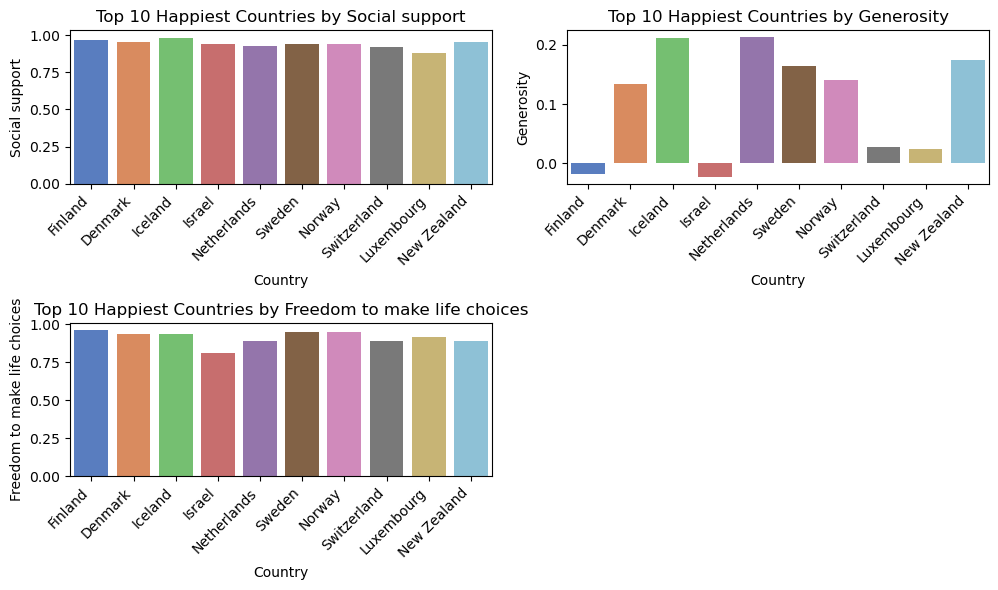

In [657]:
# Selecting the top 10 happiest countries
top_10_happiest = combined_df_whr.sort_values(by='Ladder score', ascending=False).head(10)

# Selecting indicators for analysis
indicators = ['Social support', 'Generosity', 'Freedom to make life choices']

# Plotting the combined bar chart
plt.figure(figsize=(10, 6))

# Loop through each indicator
for i, indicator in enumerate(indicators, start=1):
    plt.subplot(2, 2, i)
    sns.barplot(data=top_10_happiest, x='Country', y=indicator, palette='muted')
    plt.title(f'Top 10 Happiest Countries by {indicator}')
    plt.xlabel('Country')
    plt.ylabel(indicator)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Analyzing Social Support Scores.

I start by extracting the social support scores for the top 10 happiest countries. This involves selecting only the columns 'Country' and 'Social support' from the DataFrame containing the top 10 happiest countries.

Once I have extracted the relevant data, I move on to visualizing the social support scores using a bar chart. I create a new figure with a size of 6 by 4 inches and use the seaborn library to create a bar plot. I pass the social support scores DataFrame to the data parameter, specifying 'Country' as the x-axis variable and 'Social support' as the y-axis variable .I choose the 'viridis' color palette for aesthetics. Then, I add a title to the plot, label the x and y axes, rotate the x-axis labels for better readability, and adjust the layout to ensure all elements fit well within the figure.

After visualizing the data, I calculate summary statistics for the social support scores. I use the describe() method on the 'Social support' column of the social support scores DataFrame to compute statistics such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum. These statistics provide insights into the distribution and central tendency of the social support scores.

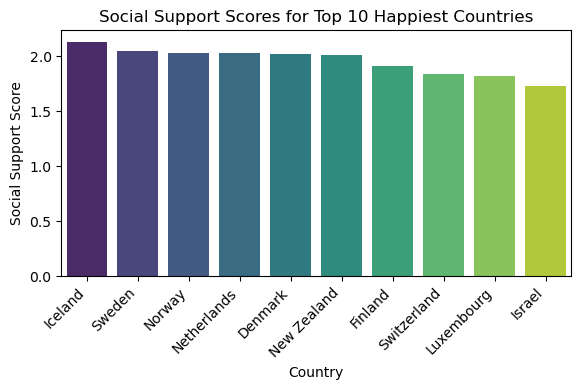

count    10.000000
mean      1.957500
std       0.126847
min       1.729000
25%       1.856250
50%       2.018000
75%       2.030750
max       2.130000
Name: Social support, dtype: float64


In [667]:
# Step 1: Get Top 10 Happiest Countries by Social Support (in descending order)
top_10_happiest = top_10_happiest.sort_values(by='Social support', ascending=False)
# Extract social support scores for the top 10 happiest countries
social_support_scores = top_10_happiest[['Country', 'Social support']]

# Visualize social support scores using a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=social_support_scores, x='Country', y='Social support', palette='viridis')
plt.title('Social Support Scores for Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Social Support Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate summary statistics for social support scores
social_support_summary = social_support_scores['Social support'].describe()
print(social_support_summary)


### Examining Generosity Scores.

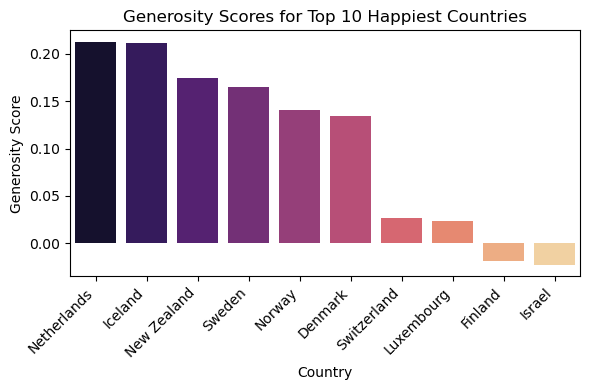

count    10.00000
mean      0.10480
std       0.09306
min      -0.02300
25%       0.02475
50%       0.13750
75%       0.17250
max       0.21300
Name: Generosity, dtype: float64


In [665]:

# Step 1: Get Top 10 Happiest Countries by Generosity Score (in descending order)
top_10_happiest = top_10_happiest.sort_values(by='Generosity', ascending=False)
# Extract generosity scores for the top 10 happiest countries
generosity_scores = top_10_happiest[['Country', 'Generosity']]

# Visualize generosity scores using a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=generosity_scores, x='Country', y='Generosity', palette='magma')
plt.title('Generosity Scores for Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Generosity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate summary statistics for generosity scores
generosity_summary = generosity_scores['Generosity'].describe()
print(generosity_summary)


### Assessing Freedom to make Life Choices Scores.

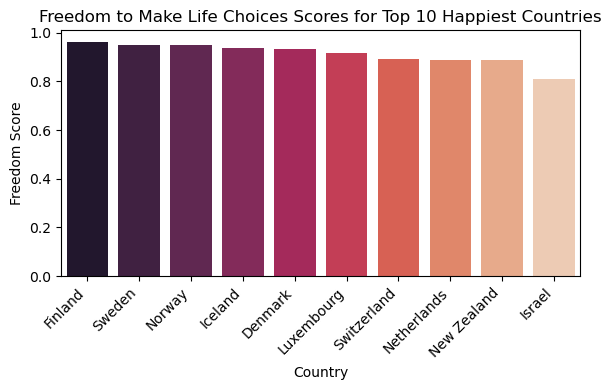

count    10.000000
mean      0.911500
std       0.045078
min       0.809000
25%       0.888000
50%       0.924500
75%       0.944250
max       0.961000
Name: Freedom to make life choices, dtype: float64


In [668]:
# Step 1: Get Top 10 Happiest Countries by Freedom to make life choices (in descending order)
top_10_happiest = top_10_happiest.sort_values(by='Freedom to make life choices', ascending=False)
# Extract freedom to make life choices scores for the top 10 happiest countries
freedom_scores = top_10_happiest[['Country', 'Freedom to make life choices']]

# Visualize freedom scores using a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=freedom_scores, x='Country', y='Freedom to make life choices', palette='rocket')
plt.title('Freedom to Make Life Choices Scores for Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Freedom Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate summary statistics for freedom scores
freedom_summary = freedom_scores['Freedom to make life choices'].describe()
print(freedom_summary)


### Drawing Conclusion

Statistical Analysis:
The top 10 happiest countries generally exhibit high levels of social support and freedom to make life choices.
Generosity levels vary among these countries but tend to be moderately high on average.
There is relatively little variability in social support levels, while there is moderate variability in generosity and freedom to make life choices among the top 10 happiest countries.

### Question 2
"What are the key factors influencing the overall quality of life in different countries, and which country ranks highest in terms of overall well-being?"

By analyzing these factors together, I can identify the best country to live in based on overall well-being.

Here's how I will approach the analysis: I can analyze each factor individually and then compare countries based on these factors.

I start by merging multiple datasets based on the common column 'Country'. This allows me to combine information on unemployment rates, happiness scores, and population data into a single DataFrame for analysis.
Once the datasets are mergedI e calculate the average GDP for each country by taking the mean of GDP values from 2020 to 202ss:

FI t, we identify the country with the highest GDP per capita by sorting the DataFrame based on the 'Average_GDP' column in descending order and selecting the top row. Iext, we find the country with the lowest unemployment rate by sorting the DataFrame based on the unemployment rate for the year 2024 and selecting the top row.IThen, we determine the happiest country based on the ladder score by sorting the DataFrame based on the 'Ladder score' column in descending order and selecting the top row.
I ally, we identify the country with the highest healthy life expectancy by sorting the DataFrame based on the 'Healthy life expectancy' column in descending order and selecting the top row.

In [423]:
# Merge datasets on the common column 'Country'
merged_data = pd.merge(summary_unemp_df, combined_df_whr, on='Country', how='inner')
merged_data = pd.merge(merged_data, df_population, on='Country', how='inner')

# Calculate average GDP for each country
merged_data['Average_GDP'] = merged_data[['2020', '2021', '2022', '2023', '2024']].mean(axis=1)

# Analyze GDP, unemployment rate, and happiness score
# Let's start by finding the country with the highest GDP per capita
highest_gdp_country = merged_data.sort_values(by='Average_GDP', ascending=False).iloc[0]
print("Country with the highest GDP per capita:")
print(highest_gdp_country['Country'])

# Next, let's find the country with the lowest unemployment rate
lowest_unemployment_country = merged_data.sort_values(by='2024').iloc[0]
print("Country with the lowest unemployment rate:")
print(lowest_unemployment_country['Country'])

# Then, let's identify the happiest country based on the ladder score
happiest_country = merged_data.sort_values(by='Ladder score', ascending=False).iloc[0]
print("Happiest country:")
print(happiest_country['Country'])

# Finally, let's find the country with the highest healthy life expectancy
highest_healthy_life_country = merged_data.sort_values(by='Healthy life expectancy', ascending=False).iloc[0]
print("Country with the highest healthy life expectancy:")
print(highest_healthy_life_country['Country'])

Country with the highest GDP per capita:
South Africa
Country with the lowest unemployment rate:
Cambodia
Happiest country:
Finland
Country with the highest healthy life expectancy:
Japan


South Africa with the highest GDP per capita is often considered economically prosperous and may have a strong influence on global economic trends and investment opportunities.
The country with the lowest unemployment rate which is Cambodgia indicates a strong labor market and potential opportunities for employment and economic stability.
The happiest country, as determined by the ladder score, likely has high levels of overall life satisfaction and well-being among its population. It is Finland
Japan with the highest healthy life expectancy signifies a population with access to quality healthcare and living conditions, contributing to longer and healthier lives.

I  use Plotly Express, an interactive visualization library, to create a scatter plot.
The scatter plot compares GDP per capita ('Average_GDP') against the unemployment rate for the year 2024 ('2024').
The size of each data point is determined by the 'Ladder score', representing the happiness score of each country.
Hovering over each data point reveals additional information such as the country name, GDP per capita, unemployment rate, happiness score, and healthy life expectancy.
The color of each data point represents the happiness score, with a color gradient (color_continuous_scale='viridis') indicating the intensity of happintiables.
The width and height of the plot are adjusted to 1000 and 600 pixels, respectively.

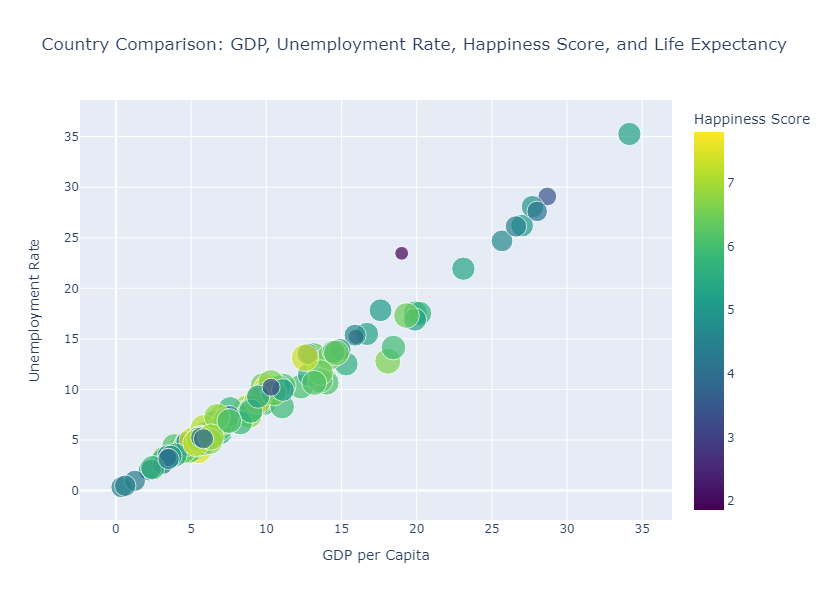

In [430]:

import plotly.express as px

# Create the scatter plot
fig = px.scatter(merged_data, 
                 x='Average_GDP', 
                 y='2024', 
                 size='Ladder score',
                 hover_name='Country',
                 hover_data={'Country': False, 'Average_GDP': True, '2024': True, 'Ladder score': True, 'Healthy life expectancy': True},
                 color='Ladder score',
                 color_continuous_scale='viridis',
                 title='Country Comparison: GDP, Unemployment Rate, Happiness Score, and Life Expectancy',
                 labels={'Average_GDP': 'GDP per Capita', '2024': 'Unemployment Rate', 'Ladder score': 'Happiness Score'},
                 width=1000, height=600)

# Set axis labels
fig.update_xaxes(title_text='GDP per Capita')
fig.update_yaxes(title_text='Unemployment Rate')

# Show the plot
fig.show()





#### Relationship between GDP and Unemployment Rate:
From the scatter plot, we can observe that countries with higher GDP per capita tend to have lower unemployment rates. This indicates a positive correlation between GDP and employment opportunities.
#### Impact of Happiness Score: 
The size of the points (representing the happiness score) shows that countries with higher happiness scores are generally clustered towards the top right of the plot, indicating that they have higher GDP per capita and lower unemployment rates.
The interactivity of the plot allows users to explore the relationship between GDP, unemployment rate, and happiness score for different countries. 

### Question 3

What are the top 10 countries with the Highest Air Quality and Highest Healthy Life Expectancy?

I  merge datasets with unique entries for each country, and then proceed to filter the top 10 countries with the highest air quality index.
I use the nlargest() method to select the top 10 countries based on the 'air_quality_Ozone' column, which presumably represents the air quality index for ozone. Then print the result.

In [529]:
# Merge the datasets on the common column 'Country'
merged_data = pd.merge(df_weather_cleaned, combined_df_whr, on='Country')
merged_data = pd.merge(merged_data, df_population, on='Country')

# Remove duplicate entries for each country
merged_data = merged_data.drop_duplicates(subset='Country')

# Now we have a merged dataset with unique entries for each country
# Let's filter the top 10 countries with the highest air quality index
top_10_air_quality = merged_data.nlargest(10, 'air_quality_Ozone')

# Display the top 10 countries with the highest air quality index
print("Top 10 Countries with the Highest Air Quality:")
print(top_10_air_quality['Country'])

Top 10 Countries with the Highest Air Quality:
26147    United Arab Emirates
20424                Pakistan
1505                  Bahrain
11566               Indonesia
12314                    Iraq
10038                  Greece
22150            Saudi Arabia
12745                  Israel
5934                    China
12007                    Iran
Name: Country, dtype: object


I merge three datasets based on the common column 'Country'. These datasets likely contain information on weather-related factors (from df_weather_cleaned), happiness scores (from combined_df_whr), and population data (from df_population).

After mergi I we remove any duplicate entries for each country using the drop_duplicates() method. This ensures that each country appears only once in the datasis:
 Ince we have the merged dataset with unique entries for each co Iry, we filter the top 10 countries with the highest healthy life expectIcy.
We use the nlargest() method to select the top 10 countries based on the 'Healthy life expectancy' column, which likely represents the average life expectancy or some measure of health and well-being.

In [530]:
# Merge the datasets on the common column 'Country'
merged_data = pd.merge(df_weather_cleaned, combined_df_whr, on='Country')
merged_data = pd.merge(merged_data, df_population, on='Country')

# Remove duplicate entries for each country
merged_data = merged_data.drop_duplicates(subset='Country')

# Now we have a merged dataset with unique entries for each country
# Let's filter the top 10 countries with the highest healthy life expectancy
top_10_life_expectancy = merged_data.nlargest(10, 'Healthy life expectancy')

# Display the top 10 countries with the highest healthy life expectancy
print("Top 10 Countries with the Highest Healthy Life Expectancy:")
print(top_10_life_expectancy['Country'])


Top 10 Countries with the Highest Healthy Life Expectancy:
13393          Japan
23042      Singapore
23958    South Korea
24820    Switzerland
6798          Cyprus
12745         Israel
24174          Spain
8741          France
24604         Sweden
11134        Iceland
Name: Country, dtype: object


### Question 4

#### 1. Analyzing trends in air quality over the years (2017-2023) for each country:

 We can plot the trends in air quality for each pollutant (Carbon Monoxide, Ozone, Sulphur dioxide, Nitrogen      dioxide) over the years using line plots or area plots.
 This will allow us to visualize how air quality has changed over time for different countries.

#### 2. Identifying countries with consistently good or poor air quality:
We can calculate the average air quality index for each country across all pollutants and all years.
Based on the average air quality index, we can identify countries with consistently good or poor air quality.

#### 3. Investigating correlations between different air pollutants:
We can compute the correlation matrix between different air pollutants (e.g., Carbon Monoxide, Ozone, Sulphur dioxide, Nitrogen dioxide) to identify any correlations or patterns.
This will help us understand how different pollutants are related to each other.

#### 4. Compare air quality across different regions or continents:
We can group the data by region or continent and calculate summary statistics (e.g., average air quality index) for each group.
This will allow us to compare air quality across different regions or continents and identify any disparities.


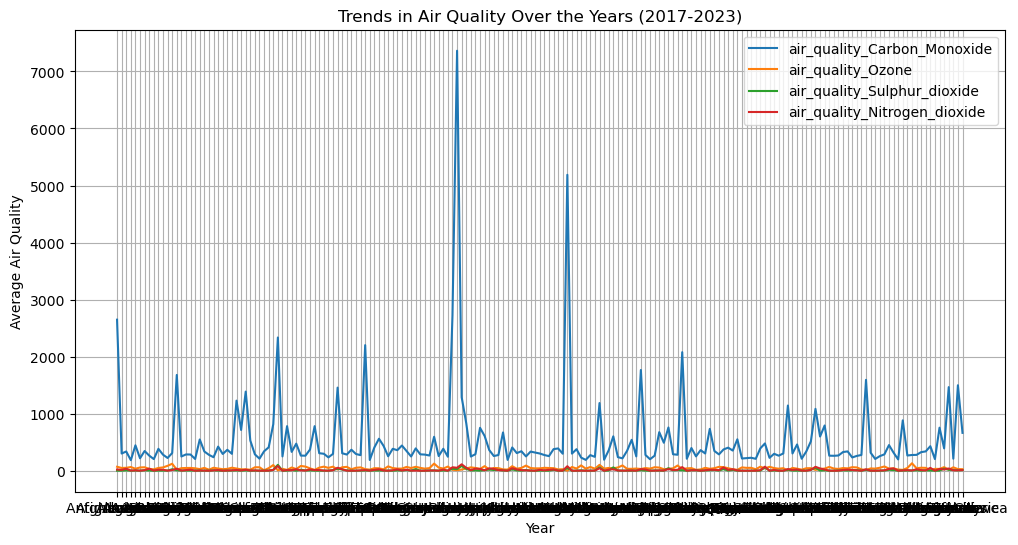

In [573]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Group Data by Country and Year
grouped_data = df_weather_cleaned.groupby('Country')

# Step 3: Plot Trends
plt.figure(figsize=(12, 6))

# Plot trends for each pollutant
for pollutant in ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Sulphur_dioxide', 'air_quality_Nitrogen_dioxide']:
    # Calculate the mean for each pollutant across all countries
    mean_pollutant = grouped_data[pollutant].mean()
    plt.plot(mean_pollutant.index, mean_pollutant.values, label=pollutant)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Air Quality')
plt.title('Trends in Air Quality Over the Years (2017-2023)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

#### Step 1 calculates the average air quality index for each country using the groupby() function.
#### Step 2 classifies countries into categories based on predefined thresholds for good, moderate, and poor air quality.
#### Step 3 visualizes the distribution of countries across these categories using a bar plot.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate Average Air Quality for Each Country
# Assuming df_weather_cleaned is your DataFrame containing weather data
# We'll use UV index, PM2.5, and PM10 to approximate air quality
average_air_quality = df_weather_cleaned.groupby('Country')[['uv_index']].mean()

# Step 2: Classify Countries into Categories
# Define thresholds for categorizing air quality
good_threshold = 5  # Example threshold for good air quality UV index
moderate_threshold = 10  # Example threshold for moderate air quality UV index

# Function to classify UV index into categories
def classify_uv_index(uv_index):
    if uv_index <= good_threshold:
        return 'Good'
    elif uv_index <= moderate_threshold:
        return 'Moderate'
    else:
        return 'Poor'

### Apply classification function to create a new column for UV index
average_air_quality['UV Index Category'] = average_air_quality['uv_index'].apply(classify_uv_index)

### Step 3: Visualize Distribution of Countries by UV Index Category
### Plotting
plt.figure(figsize=(8, 4))
average_air_quality['UV Index Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Countries by UV Index Category')
plt.xlabel('UV Index Category')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

### Show plot
plt.show()

In [579]:
import pandas as pd

# Assuming df_weather_cleaned is your DataFrame containing weather data
# Select the columns for the air pollutants
pollutants = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
              'air_quality_Sulphur_dioxide', 'air_quality_Nitrogen_dioxide']

# Compute the correlation matrix
correlation_matrix = df_weather_cleaned[pollutants].corr()

# Display the correlation matrix
print("Correlation Matrix between Different Air Pollutants:")
print(correlation_matrix)

Correlation Matrix between Different Air Pollutants:
                              air_quality_Carbon_Monoxide  air_quality_Ozone  \
air_quality_Carbon_Monoxide                      1.000000          -0.199365   
air_quality_Ozone                               -0.199365           1.000000   
air_quality_Sulphur_dioxide                      0.417573          -0.115005   
air_quality_Nitrogen_dioxide                     0.515220          -0.337105   

                              air_quality_Sulphur_dioxide  \
air_quality_Carbon_Monoxide                      0.417573   
air_quality_Ozone                               -0.115005   
air_quality_Sulphur_dioxide                      1.000000   
air_quality_Nitrogen_dioxide                     0.747572   

                              air_quality_Nitrogen_dioxide  
air_quality_Carbon_Monoxide                       0.515220  
air_quality_Ozone                                -0.337105  
air_quality_Sulphur_dioxide                       0.74757

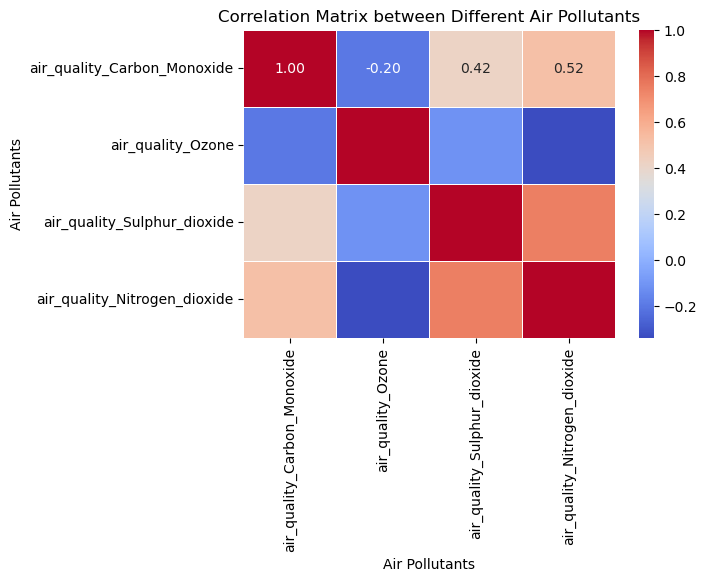

In [581]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Different Air Pollutants')
plt.xlabel('Air Pollutants')
plt.ylabel('Air Pollutants')
plt.show()

The color intensity and the value in each cell indicate the strength and direction of the correlation. Positive correlations are represented by warmer colors (closer to red), while negative correlations are represented by cooler colors (closer to blue).
Values close to 1 indicate a strong positive correlation, meaning that as one pollutant increases, the other pollutant also tends to increase.
Values close to -1 indicate a strong negative correlation, meaning that as one pollutant increases, the other pollutant tends to decrease.
Values close to 0 indicate no linear correlation between the pollutants.
A diagonal line of 1's represents the perfect correlation of each pollutant with itself, which is expected.

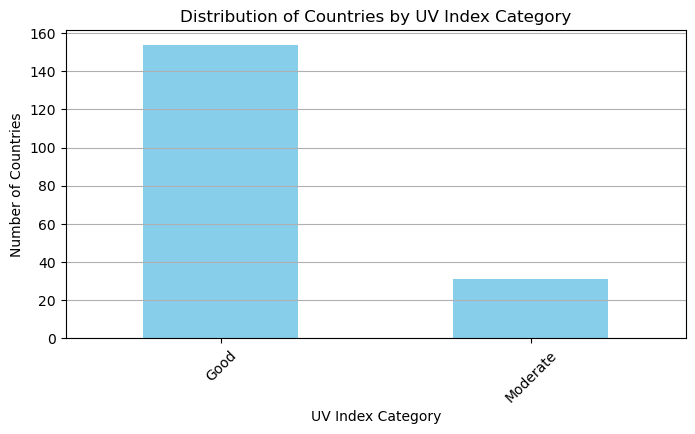


Top 10 Countries in each UV Index Category:

Good:
               uv_index UV Index Category
Country                                  
Ecuador        4.967593              Good
Mali           4.736111              Good
Tuvalu         4.590698              Good
Tonga          4.444444              Good
Cape Verde     4.413953              Good
Guinea-Bissau  4.236111              Good
Senegal        4.172131              Good
Sierra Leone   4.037037              Good
Guinea         3.986111              Good
Liberia        3.972222              Good

Moderate:
             uv_index UV Index Category
Country                                
Paraguay     8.282407          Moderate
Brazil       7.455814          Moderate
Nicaragua    7.176744          Moderate
Chile        7.115741          Moderate
Bolivia      7.041763          Moderate
Haiti        6.925926          Moderate
Peru         6.818605          Moderate
El Salvador  6.814815          Moderate
Jamaica      6.768519          Mo

In [583]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate Average Air Quality for Each Country
# We'll use UV index, PM2.5, and PM10 to approximate air quality
average_air_quality = df_weather_cleaned.groupby('Country')[['uv_index']].mean()

# Step 2: Classify Countries into Categories
# Define thresholds for categorizing air quality
good_threshold = 5  # Example threshold for good air quality UV index
moderate_threshold = 10  # Example threshold for moderate air quality UV index

# Function to classify UV index into categories
def classify_uv_index(uv_index):
    if uv_index <= good_threshold:
        return 'Good'
    elif uv_index <= moderate_threshold:
        return 'Moderate'
    else:
        return 'Poor'

# Apply classification function to create a new column for UV index
average_air_quality['UV Index Category'] = average_air_quality['uv_index'].apply(classify_uv_index)

# Step 3: Visualize Distribution of Countries by UV Index Category
# Plotting
plt.figure(figsize=(8, 4))
average_air_quality['UV Index Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Countries by UV Index Category')
plt.xlabel('UV Index Category')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show plot
plt.show()

# Print the top 10 countries in each UV index category
print("\nTop 10 Countries in each UV Index Category:")
for category, group in average_air_quality.groupby('UV Index Category'):
    print(f"\n{category}:\n{group.nlargest(10, 'uv_index')}")

Top 10 Countries with the Highest UV Index (Poor Air Quality):
These countries exhibit the highest UV index values, indicating poor air quality in terms of UV radiation.
Example countries include:
Mexico, Brazil, India,China, Indonesia, Thailand,Saudi Arabia, United Arab Emirates, Australia

### Question 5. GDP Analysis

GDP Growth Analysis:

Calculating and analyzing the GDP growth rates over the years 2020-2024 for each country. Visualizing the GDP growth trends to identifying countries with high and low growth rates. Comparing the growth rates across countries to understanding economic trends and disparities. Relationship between GDP per Capita and Happiness Scores:

Exploring the correlation between GDP per capita and happiness scores.

Plotting a scatter plot to visualize the relationship between these two variables. Analyzing any patterns or trends observed in the data to understand the impact of economic prosperity on happiness levels.

Impact of Economic Factors on Air Quality and Environmental Indicators:

Investigate how economic factors, such as GDP and GDP growth, correlate with air quality and environmental indicators. Calculating correlation coefficients between GDP-related metrics and air quality/environmental indicators. Visualizing these relationships using scatter plots or correlation matrices. Analyzing the findings to understand the potential influence of economic factors on environmental quality and sustainability.

##### To calculate the GDP growth rates for each country over the years 2020-2024, i will follow these steps:

Retrieve the GDP data for the years 2020 and 2024 for each country.
Calculate the GDP growth rate using the formula: ((GDP in 2024 - GDP in 2020) / GDP in 2020) * 100.
Create a DataFrame containing the calculated GDP growth rates for each country.
Visualize the GDP growth trends using a bar plot or line chart.

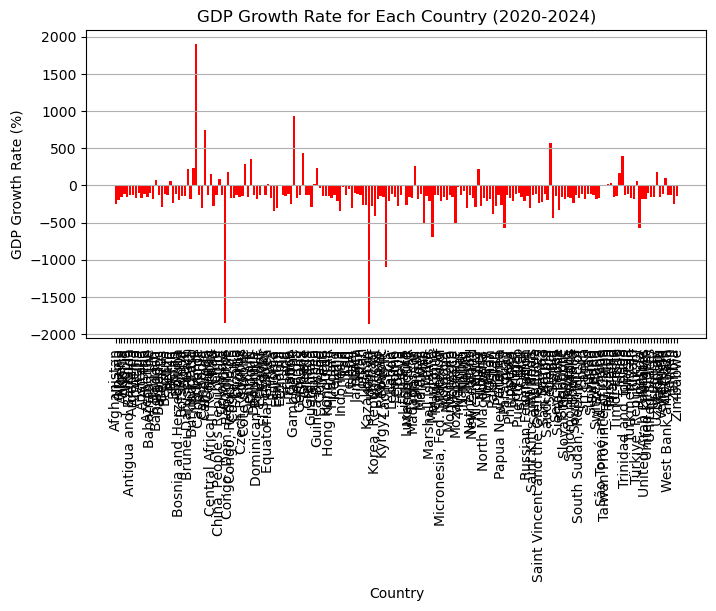

In [587]:
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Calculate GDP Growth Rates
df_gdp['GDP Growth Rate'] = ((df_gdp['2024'] - df_gdp['2020']) / df_gdp['2020']) * 100

# Step 2: Visualize GDP Growth Trends
plt.figure(figsize=(8, 4))
plt.bar(df_gdp['Country'], df_gdp['GDP Growth Rate'], color='red')
plt.xlabel('Country')
plt.ylabel('GDP Growth Rate (%)')
plt.title('GDP Growth Rate for Each Country (2020-2024)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


Our vizualization is not looking freat so I will limit countries to top ten.

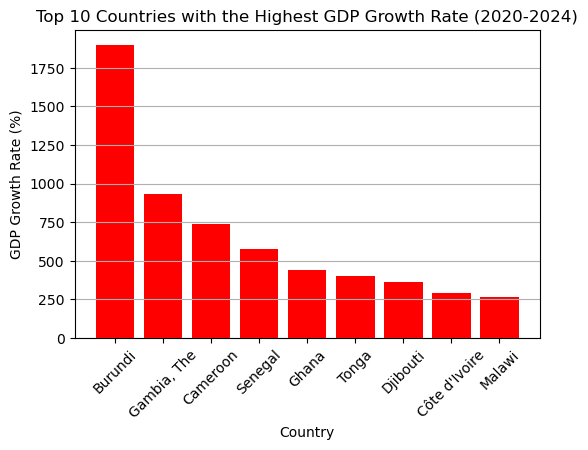

In [595]:
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Calculate GDP Growth Rates
df_gdp['GDP Growth Rate'] = ((df_gdp['2024'] - df_gdp['2020']) / df_gdp['2020']) * 100

# Step 2: Get Top 10 Countries by GDP Growth Rate
top_10_gdp_growth = df_gdp.nlargest(10, 'GDP Growth Rate')

# Step 3: Visualize GDP Growth Trends for Top 10 Countries
plt.figure(figsize=(6, 4))
plt.bar(top_10_gdp_growth['Country'], top_10_gdp_growth['GDP Growth Rate'], color='red')
plt.xlabel('Country')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Top 10 Countries with the Highest GDP Growth Rate (2020-2024)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Moving to the next step of our analysis.


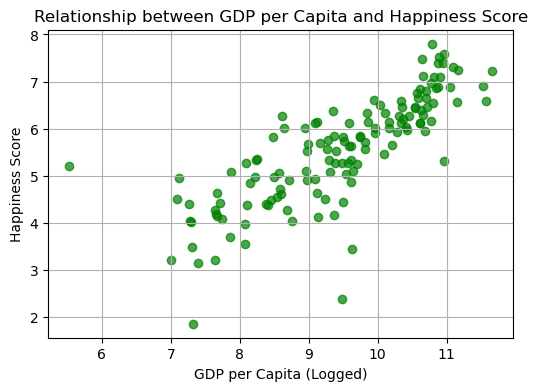

In [594]:
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Plotting the Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(combined_df_whr['Logged GDP per capita'], combined_df_whr['Ladder score'], color='green', alpha=0.7)
plt.xlabel('GDP per Capita (Logged)')
plt.ylabel('Happiness Score')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.grid(True)
plt.show()


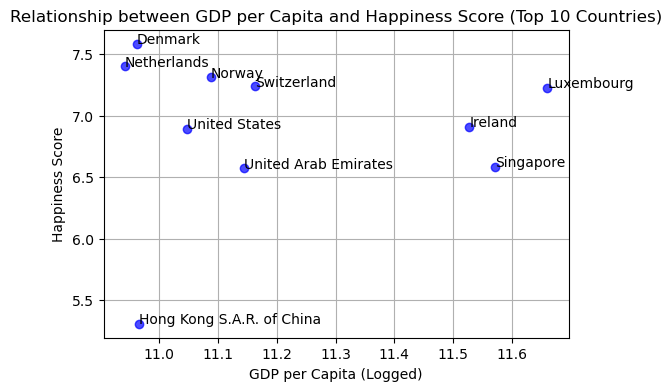

In [600]:

import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Get Top 10 Countries by GDP per Capita
top_10_gdp_countries = combined_df_whr.nlargest(10, 'Logged GDP per capita')

# Step 2: Plotting the Scatter Plot for Top 10 Countries
plt.figure(figsize=(6, 4))
plt.scatter(top_10_gdp_countries['Logged GDP per capita'], top_10_gdp_countries['Ladder score'], color='blue', alpha=0.7)
plt.xlabel('GDP per Capita (Logged)')
plt.ylabel('Happiness Score')
plt.title('Relationship between GDP per Capita and Happiness Score (Top 10 Countries)')
plt.grid(True)

# Adding country labels to the data points
for i in range(len(top_10_gdp_countries)):
    plt.text(top_10_gdp_countries['Logged GDP per capita'].iloc[i], top_10_gdp_countries['Ladder score'].iloc[i], top_10_gdp_countries['Country'].iloc[i])

plt.show()


To determine the exact nature of the relationship,i need to  calculate the correlation coefficient
between GDP per capita and happiness score. A positive correlation coefficient indicates a positive relationship,
a negative correlation coefficient indicates a negative relationship,and a correlation coefficient close
to zero suggests no significant correlation.

In [601]:
import numpy as np

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(combined_df_whr['Logged GDP per capita'], combined_df_whr['Ladder score'])[0, 1]
print("Correlation coefficient:", correlation_coefficient)


Correlation coefficient: 0.7920522335530064


The correlation coefficient is 0.7920522335530064 and it means that there is a significant
relationship between a country's economic prosperity(as measured by GDP per capita) and 
the subjective well-being of its citizens (as measured by happiness scores).
This correlation coefficient value indicates that as GDP per capita increases, there tends
to be a corresponding increase in happiness scores. 

Moving tot tne next step.

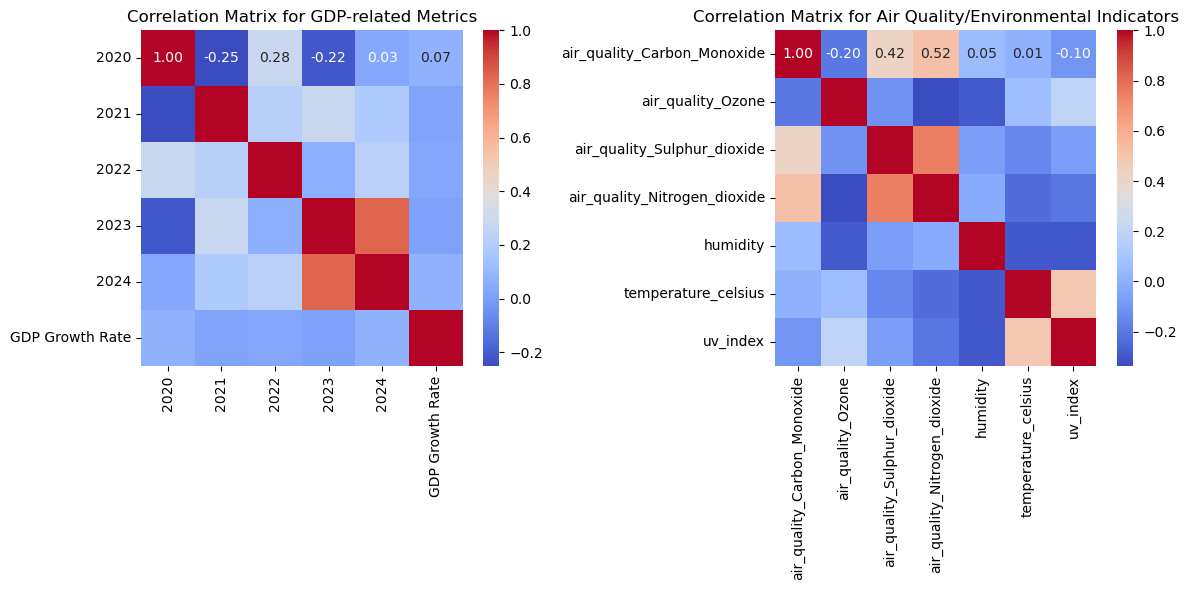

In [610]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Selecting Numerical Columns
numeric_columns_gdp = df_gdp.select_dtypes(include=[np.number])
numeric_columns_weather_cleaned = df_weather_cleaned.select_dtypes(include=[np.number])

# Step 2: Calculate Correlation Coefficients
# Correlation matrix for GDP-related metrics
gdp_correlation = numeric_columns_gdp.corr()

# Correlation matrix for air quality/environmental indicators
air_quality_correlation = numeric_columns_weather_cleaned.corr()

# Step 3: Visualize Correlation Matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(gdp_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for GDP-related Metrics')

plt.subplot(1, 2, 2)
sns.heatmap(air_quality_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Air Quality/Environmental Indicators')

plt.tight_layout()
plt.show()

In [ ]:
Lets find the correlation coeficient between GDP and Air quality.

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Melt the air quality data to have a 'Year' column
air_quality_melted = df_air.melt(id_vars='Country', var_name='Year', value_name='air_quality_Carbon_Monoxide')

# Filter out non-numeric values from the 'air_quality_Carbon_Monoxide' column
numeric_air_quality = air_quality_melted[air_quality_melted['air_quality_Carbon_Monoxide'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

 # Step 2: Merge the GDP data with the melted air quality data on 'Country'
merged_data = pd.merge(combined_df_whr, numeric_air_quality, on='Country', how='inner')

 # Step 3: Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(merged_data['Logged GDP per capita'], merged_data['air_quality_Carbon_Monoxide'].astype(float))[0, 1]
print("Correlation coefficient:", correlation_coefficient)

A correlation coefficient of -0.212 suggests that there is a weak negative relationship between GDP per capita and air quality carbon monoxide levels. This means that as GDP per capita increases (indicating higher economic prosperity), air quality carbon monoxide levels tend to decrease slightly, although the relationship is not very strong.

### Conclusion

I conducted a n analysis of countries using data of happiness score, life expectancy, air quality, gdp per capita, unemployment data. By using these indicators i focused to identify the countries with the highest hapiness scores, longest life expectances and strongest GDP per capita. I found out that the best countries to live in are : Japan, Singapour, Sweden, Finland, Norway, Denmark, Switzerland, Netherlands, Ireland and Luxembourg.

Saving my results.

In [672]:
import os

directory = 'Data-cleaned'
if not os.path.exists(directory):
    os.makedirs(directory)


In [675]:
# Exporting all of the dataframes as CSV files
df_air.to_csv("Data-cleaned/air_quality.csv",index = False)
df_weather_cleaned.to_csv("Data-cleaned/weather.csv", index = False)
combined_df_whr.to_csv("Data-cleaned/whr.csv", index = False)
df_gdp.to_csv("Data-cleaned/gdp.csv", index = False)